# USED CAR_PRICE PREDICTION  

**Submitted by Mugdha Dongre
(GCDAI Student, INSAID)
(Batch: May 9,2021)**

## Table of Content

1. [Introduction](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Library Installments](#section3)<br>
    - 3.1 [Installing Libraries](#section301)<br>
    - 3.2 [Importing Libraries](#section302)<br>
4. [Data Acquisition & Descriptions](#section4)<br>
    - 4.1 [Data Description](#section401)<br>
    - 4.2 [Data Information](#section402)<br>
5. [Data Pre-processing](#section5)<br>
    - 5.1 [Pre-profiling Report](#section501)<br>
    - 5.2 [Data Cleaning](#section502)<br>
    - 5.3 [Post-Profiling Report](#section503)<br>    
6. [Exploratory Data Analysis](#section6)<br>
    - 6.1 [Analysis of Features w.r.t.Target variable](#section601)<br>
7. [Data Post-processing](#section7)<br>
    - 7.1 [Handling Categorical columns](#section701)<br>
    - 7.2 [Feature Extraction](#section702)<br>
    - 7.3 [Linear Regression](#section703)<br>
8. [Analysis of Test dataset](#section8)<br>
    - 8.1 [Handling missing values to Test dataset](#section801)<br>
    - 8.2 [Label Encoding for Categorical columns (Test dataset)](#section802)<br>
    - 8.3 [Prediction of Used car price](#section803)<br>
    - 8.4 [Preparing Submission file](#section804)<br>
    - 8.5 [Saving price values to Excel sheet](#section805)<br>

<a name = section1></a>
## 1. Introduction

**Company Introduction**

- **SWIPECAR**, is an American company that **buys and sells second hand cars.**
- **They initiated their business in the late 80s and have gained huge popularity over the years.**
- **The company clients are local and foreign customers who seek to buy and sell second hand cars.**

**Current Scenario**
- Company has started **facing loss in business due to the technical advancements.**
- There are **several competitors in the market who have been using enhanced techniques.**
- The **company is pretty old and they have been using traditional measures to estimate old cars prices.**
- These **traditional measures include weight analysis, condition of parts and build year.**
- They are looking for a **more robust way to estimate the price of old cars.**


<a name = section2></a>
## 2. Problem Definition

**The current process suffers from the following problems:**

- They have been using manual traditional measures to estimate old cars prices.
- These measures are time consuming and not accurate.
- Company is looking for a robust way to estimate the prices of used cars.

<p align="center"><img src="https://visme.co/blog/wp-content/uploads/2020/06/animated-interactive-infographics-header-wide.gif"></p>

<a name = section3></a>
## 3. Library Installments

<a name = section301></a>
### 3.1 Installing Libraries

In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


<a name = section302></a>
### 3.2 Importing Libraries

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                             # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------

<a name = section4></a>
## 4. Data Acquisition & Description


The dataset is divided into two parts:

**Train Set:**

| Records | Features | Target Variable |
 | :-- | :-- | :-- |
| 181 | 27 |  Price |


**Test Set:**

| Records | Features | Predicted Variable |
| :-- | :-- | :-- |
| 20 | 26 | Price |


**The model developmet for price prediction will be done in Jupyter Notebook.**


|Id|Feature|Description|
|:--|:--|:--|
|01| ID |Feature uniquely identifying each record| 
|02| symboling | Degree to which the auto is riskier than its price indicates|  
|03| normalized losses | Relative average loss payment per insured vehicle year| 
|04| make| Make of the car|   
|05| fuel-type| Type of fuel consumed by the car|
|06| Aspiration| Type of internal combustion engine used|
|07| num-of-doors| Number of doors available in the car|
|08| body-style| Body style of car|
|09| drive-wheels | Drive wheel of car|
|10| engine-location| Location of engine in car|
|11| wheel-base| Distance between the centres of the front and rear wheels|
|12| length| Length of the car|
|13|post-code| Postal Code of the customer| 
|14| width | Width of the car.|  
|15| height | Height of the car| 
|16| curb-weight| Total mass of a vehicle with standard equipment|   
|17| engine-type| Type of engine used in the car|
|18| num-of-cylinders| Number of cylinders used in the car|
|19| engine-size| Size of the engine used in the car|
|20| fuel-system| Type of fuel system used in the car|
|21| bore | Diameter of each cylinder in the piston engine|
|21| stroke| Full travel of the piston along the cylinder, in either direction|
|22| compression-ratio| Volume of the cylinder and the combustion chamber when the piston is at the bottom, and the volume of the combustion chamber when the piston is at the top|
|23| horsepower| The power an engine produces by a car|
|24| peak-rpm | The max power produced by engine in terms of revolutions per minute|  
|25| city-mpg | City mileage per gallon rating of car| 
|26| highway-mpg| Highway mileage per gallon rating of car|   
|27| price| Price of the car |

In [3]:
# Loading the Train dataset #
missing_value = ['n.a','?','na','NA']                    # Data file contains values with '?' sign
data_trn = pd.read_csv(r'E:\INSAID Projects\used car prediction_ML1\TrainData.csv', na_values = missing_value)
print('Data Shape of Training Data: ', data_trn.shape)
data_trn.head()

Data Shape of Training Data:  (181, 27)


,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,-1,65.0,toyota,gas,std,four,hatchback,fwd,front,...,122,mpfi,3.31,3.54,8.7,92.0,4200.0,27,32,11248
1,2,0,188.0,bmw,gas,std,two,sedan,rwd,front,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,21,28,20970
2,3,0,NaN,renault,gas,std,four,wagon,fwd,front,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
3,4,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,...,152,idi,3.70,3.52,21.0,95.0,4150.0,28,33,13200
4,5,-2,103.0,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,24,28,15985


<a name = section401></a>
### 4.1 Data Description

In [4]:
data_trn.describe()

,ID,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,181.000000,181.000000,147.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,177.000000,177.000000,181.000000,179.000000,179.000000,181.000000,181.000000,181.000000
mean,91.000000,0.850829,120.863946,98.729282,174.174033,65.943646,53.709945,2564.165746,127.900552,3.338983,3.274463,10.154254,104.167598,5106.703911,25.132597,30.646409,13271.314917
std,52.394338,1.267045,35.086515,6.116197,12.336569,2.146114,2.497735,523.489016,42.578438,0.265255,0.309848,3.982306,37.967385,473.256441,6.418211,6.888545,8106.479635
min,1.000000,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.680000,2.190000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,46.000000,0.000000,94.000000,94.500000,166.800000,64.200000,51.600000,2190.000000,98.000000,3.150000,3.110000,8.600000,71.000000,4800.000000,19.000000,25.000000,7775.000000
50%,91.000000,1.000000,115.000000,96.900000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.330000,3.350000,9.000000,95.000000,5100.000000,24.000000,30.000000,10295.000000
75%,136.000000,2.000000,148.000000,102.400000,183.100000,66.600000,55.500000,2935.000000,146.000000,3.590000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,181.000000,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


<a name = section402></a>
### 4.2 Data Information

In [5]:
data_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 181 non-null    int64  
 1   symboling          181 non-null    int64  
 2   normalized-losses  147 non-null    float64
 3   make               181 non-null    object 
 4   fuel-type          181 non-null    object 
 5   aspiration         181 non-null    object 
 6   num-of-doors       179 non-null    object 
 7   body-style         181 non-null    object 
 8   drive-wheels       181 non-null    object 
 9   engine-location    181 non-null    object 
 10  wheel-base         181 non-null    float64
 11  length             181 non-null    float64
 12  width              181 non-null    float64
 13  height             181 non-null    float64
 14  curb-weight        181 non-null    int64  
 15  engine-type        181 non-null    object 
 16  num-of-cylinders   181 non

## Observations :
 - Data set has **missing values** in columns **'normalized losses','num-of-doors','bore','stroke','horsepower' and 'peak-ram'.** 
 - Data Preprocessing report will give clrar idea about the dataset.
 - Cleaning of data is done with **.fillna() with mode and median values.**

<a name = section5></a>
## 5. Data Pre-processing

In [6]:
data_trn.isnull().sum()

ID                    0
symboling             0
normalized-losses    34
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

<a name = section501></a>
### 5.1 Pre-profiling Report

In [7]:
profile = ProfileReport(df = data_trn, minimal = True)
profile.to_file(output_file = 'price_prediction_PreProfilingReport.html')
print('Pre-Profiling Accomplished!')


Pre-Profiling Accomplished!


<a name = section502></a>
### 5.2 Data Cleaning

In [8]:
data_trn['normalized-losses'].median()

115.0

In [9]:
data_trn['num-of-doors'].mode()

0    four
dtype: object

In [10]:
data_trn['bore'].median()

3.33

In [11]:
data_trn['stroke'].median()

3.35

In [12]:
data_trn['horsepower'].median()

95.0

In [13]:
data_trn['peak-rpm'].median()

5100.0

In [14]:
data_trn['normalized-losses'].fillna(value = 115.0, inplace = True)
data_trn['bore'].fillna(value = 3.33, inplace = True)
data_trn['stroke'].fillna(value = 3.35, inplace = True)
data_trn['horsepower'].fillna(value = 95.0, inplace = True)
data_trn['peak-rpm'].fillna(value = 5100.0, inplace = True)
data_trn['num-of-doors'].fillna(value = 'four', inplace = True)

In [15]:
data_trn.isnull().sum()

ID                   0
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [16]:
# Handling Duplicate data
print('Contains Duplicate Rows?',data_trn.duplicated().any())

Contains Duplicate Rows? False


## Observations 

- **No missing value** in the dataset.
- **No Duplicated value** in the dataset.

<a name = section503></a>
### 5.3 Post-profiling Report

In [17]:
profile = ProfileReport(df = data_trn,explorative = True)
profile.to_file(output_file = 'price_prediction_PostProfilingReport.html')
print('Post-Profiling Accomplished!')


Post-Profiling Accomplished!


**Data is clean so we are good to go for Analysis**

<a name = section6></a>
## 6. Exploratory Data Analysis

<AxesSubplot:xlabel='price', ylabel='Density'>

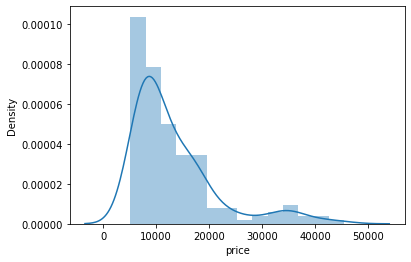

In [18]:
sns.distplot(data_trn['price'])

## Observations

 - There is **Skewness** in the target variable.
 - We have to **transform** it so it can be used for **model building.**

<a name = section601></a>
### 6.1 Analysis of features w.r.t. Target Variable

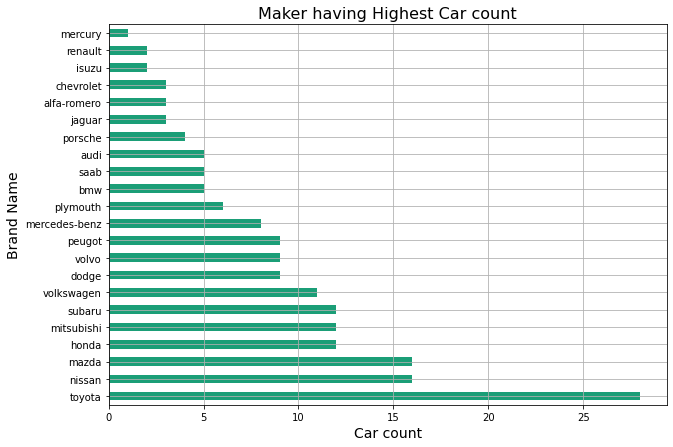

In [19]:
# Manufacturer having highest Car count
fig = plt.figure(figsize = (10,7))
data_trn['make'].value_counts().plot(kind = 'barh', cmap = 'Dark2')
plt.ylabel('Brand Name', size = 14)
plt.xlabel('Car count', size = 14)
plt.title('Maker having Highest Car count', size = 16)
plt.grid()

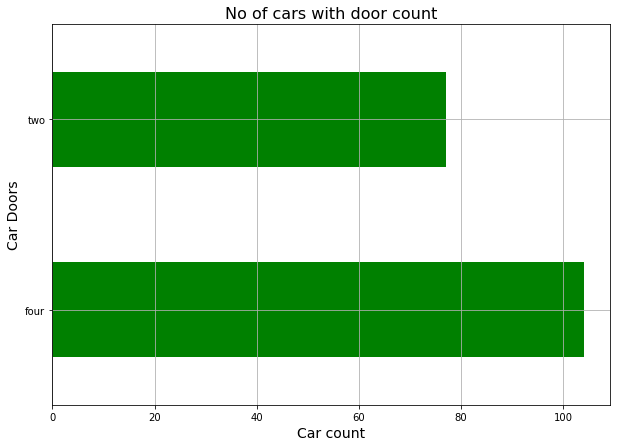

In [20]:
# No of cars having four doors
figure = plt.figure(figsize =(10,7))
data_trn['num-of-doors'].value_counts().plot(kind = 'barh',color = 'green')
plt.xlabel('Car count', size = 14)
plt.ylabel('Car Doors', size = 14)
plt.title('No of cars with door count', size = 16)
plt.grid()

Text(0.5, 1.0, 'Cars having Drive wheel count')

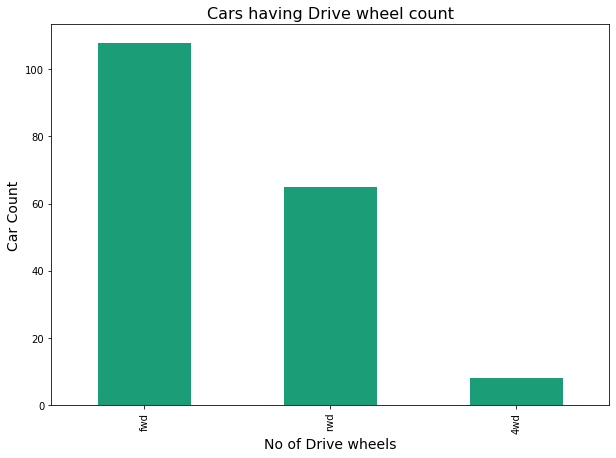

In [21]:
# Drive wheel counts for Cars
figure = plt.figure(figsize = (10,7)) 
data_trn['drive-wheels'].value_counts().plot( kind= 'bar', cmap = 'Dark2')
plt.xlabel('No of Drive wheels', size = 14)
plt.ylabel('Car Count', size = 14)
plt.title('Cars having Drive wheel count', size = 16)

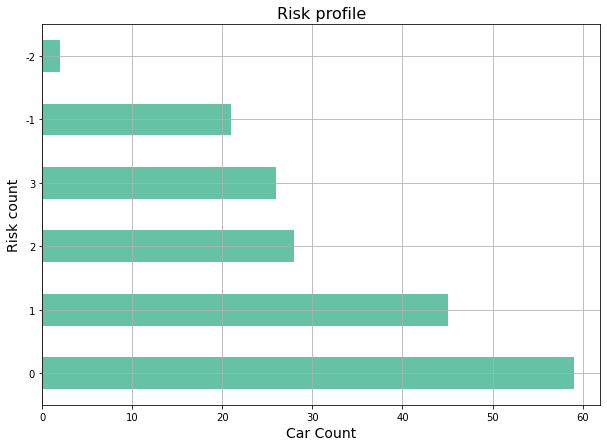

In [22]:
# Car counts with Dree of risk
figure = plt.figure(figsize = (10,7))
data_trn['symboling'].value_counts().plot(kind = 'barh', cmap = 'Set2')
plt.xlabel('Car Count', size = 14)
plt.ylabel('Risk count', size = 14)
plt.title('Risk profile', size = 16)
plt.grid()

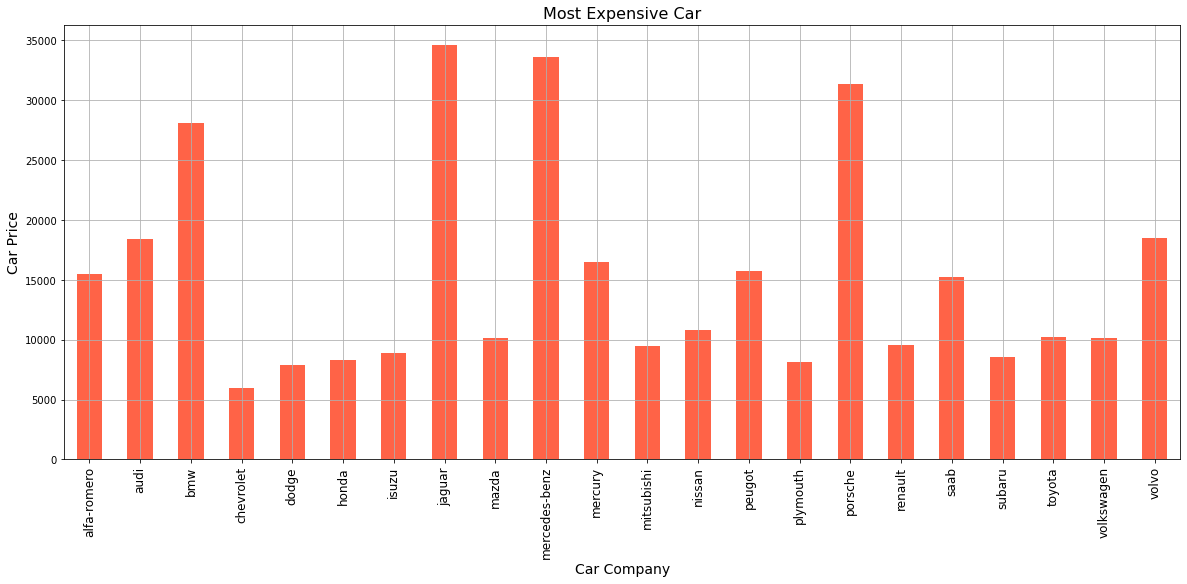

In [23]:
# Most Expensive Car
figure = plt.figure(figsize = (20,8))
make_price = data_trn.groupby('make')['price'].mean()   # value_counts().sort_values(ascending = False)[:15]
#make_price = data_trn.price.sort_values(ascending=False)[:15]
#make_price = data_trn.groupby('make')['price']#.sort_values(ascending=False)[:15]
make_price.plot.bar(color = 'tomato')
plt.xlabel('Car Company', size = 14)
plt.ylabel('Car Price', size = 14)
plt.title('Most Expensive Car', size = 16)
plt.xticks(size = 12)
plt.grid()

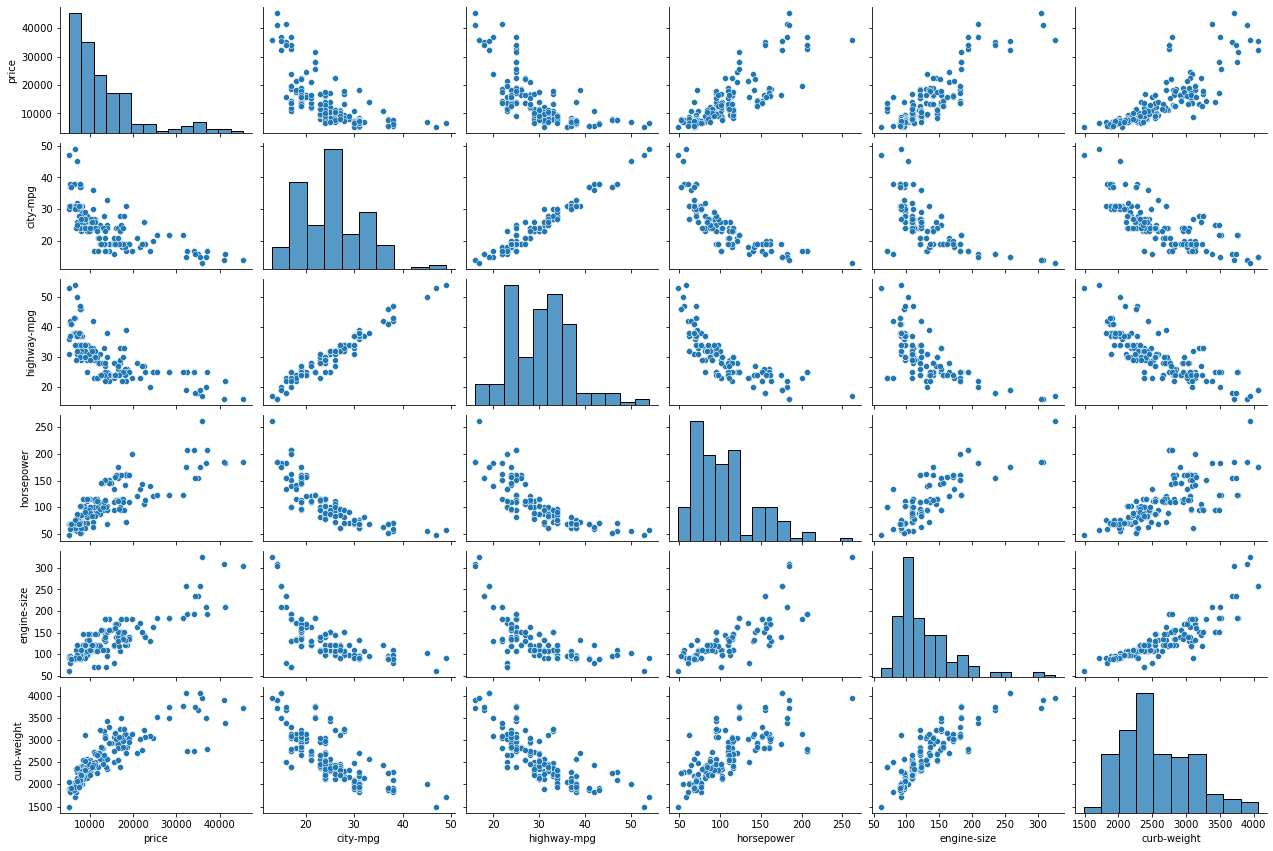

In [24]:
# Correlation between Matrices
sns.pairplot(data= data_trn[['price','city-mpg','highway-mpg','horsepower','engine-size','curb-weight']], height = 2, aspect = 1.5)

Text(0.5, 1.0, 'Correlation HeatMap')

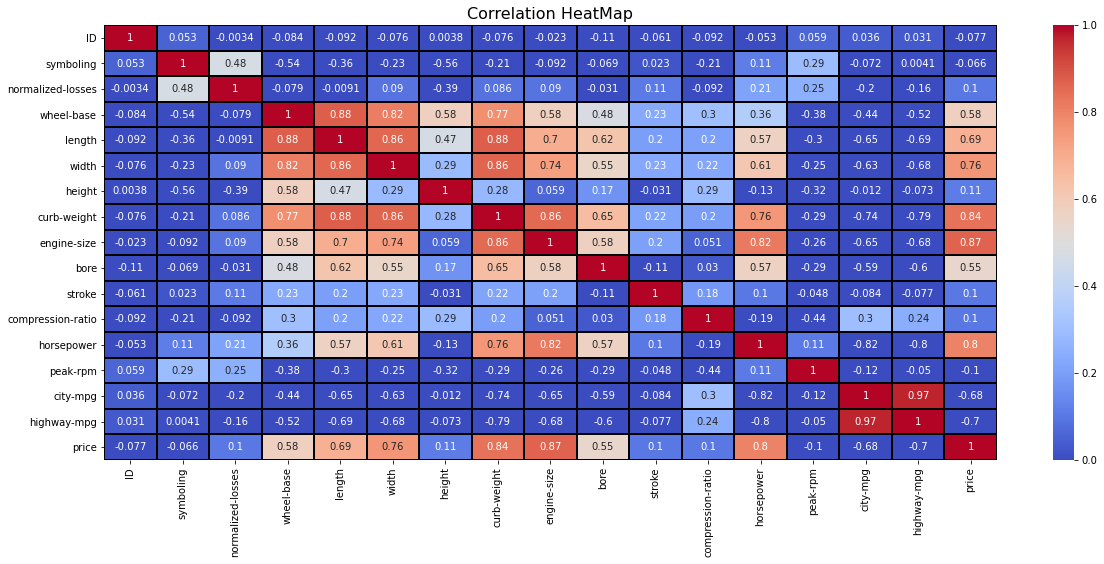

In [25]:
figure = plt.figure(figsize = (20,8))
HeatMap = sns.heatmap(data_trn.corr(),annot = True,cmap = 'coolwarm',vmin = 0, vmax = 1,linecolor = 'black',linewidths = 1)
HeatMap.set_title('Correlation HeatMap', fontdict = {'fontsize':16})

<AxesSubplot:>

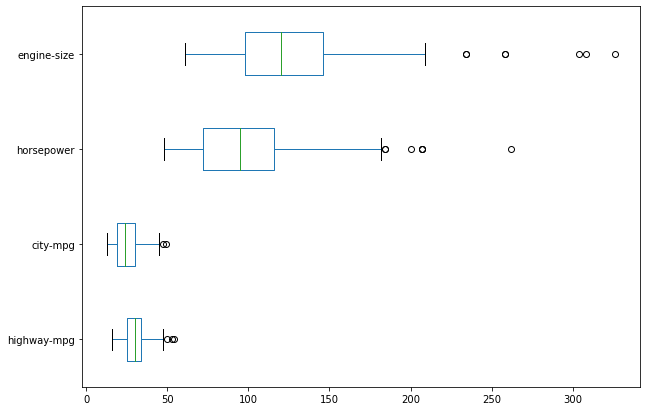

In [85]:
data_trn[['highway-mpg', 'city-mpg','horsepower','engine-size']].plot(kind='box', figsize=(10, 7), vert=False)

## Observations

 - **Price** is having **Strong Positive correlation** with **curb-weight (0.84), engine-size (0.87) and horsepower (0.8).**
 - **Price** is having **Strong Negative correlation** with **city-mpg (0.68) and highway-mpg (0.7).**
 - Some independent variables, **Measures of size** (length, width) are **highly correlated**, resulting **Multicollinearity.**
 - Some Outliers are still present in the feature columns of dataset, for which we will **apply Transformations**. 


<a name = section7></a>
## 7. Data Post-processing

 - **Machine Learning Algorithm** works with **numerical** values.
 - So, it is necessary to **convert the categorical columns into Numerical columns.**

<a name = section701></a>
### 7.1 Handling Categorical columns 

### (A) Categorical Columns : 
make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, engine-type, num-of-cylinders, fuel-system.

### (B) Numerical Columns:
ID, symboling, normalized-losses, wheel-base, length, width, height, curb-weight, bore, stroke, compression- ratio, horsepower, peak-rpm, city-mpg, highway-mpg.

In [27]:
# Creating a new Dataframe
data = data_trn.copy()

### Label Encoding for Categorical columns

In [28]:
from sklearn.preprocessing import LabelEncoder
le_make=LabelEncoder()
le_fuel_type=LabelEncoder()
le_aspiration=LabelEncoder()
le_num_of_doors=LabelEncoder()
le_body_style=LabelEncoder()
le_drive_wheels=LabelEncoder()
le_engine_location=LabelEncoder()
le_engine_type=LabelEncoder()
le_num_of_cylinders=LabelEncoder()
le_fuel_system=LabelEncoder()
data['make_n']= le_make.fit_transform(data['make'])
data['fuel-type_n']= le_fuel_type.fit_transform(data['fuel-type'])
data['aspiration_n']= le_aspiration.fit_transform(data['aspiration'])
data['num-of-doors_n']= le_num_of_doors.fit_transform(data['num-of-doors'])
data['body-style_n']= le_body_style.fit_transform(data['body-style'])
data['drive-wheels_n']= le_drive_wheels.fit_transform(data['drive-wheels'])
data['engine-location_n']= le_engine_location.fit_transform(data['engine-location'])
data['engine-type_n']= le_engine_type.fit_transform(data['engine-type'])
data['num-of-cylinders_n']= le_num_of_cylinders.fit_transform(data['num-of-cylinders'])
data['fuel-system_n']= le_fuel_system.fit_transform(data['fuel-system'])

In [29]:
data.head(10)

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,make_n,fuel-type_n,aspiration_n,num-of-doors_n,body-style_n,drive-wheels_n,engine-location_n,engine-type_n,num-of-cylinders_n,fuel-system_n
0,1,-1,65.0,toyota,gas,std,four,hatchback,fwd,front,...,19,1,0,0,2,1,0,2,2,5
1,2,0,188.0,bmw,gas,std,two,sedan,rwd,front,...,2,1,0,1,3,2,0,2,3,5
2,3,0,115.0,renault,gas,std,four,wagon,fwd,front,...,16,1,0,0,4,1,0,2,2,5
3,4,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,...,13,0,1,0,3,2,0,1,2,3
4,5,-2,103.0,volvo,gas,std,four,sedan,rwd,front,...,21,1,0,0,3,2,0,2,2,5
5,6,1,118.0,dodge,gas,turbo,two,hatchback,fwd,front,...,4,1,1,1,2,1,0,2,2,5
6,7,0,145.0,jaguar,gas,std,four,sedan,rwd,front,...,7,1,0,0,3,2,0,0,3,5
7,8,3,115.0,porsche,gas,std,two,hardtop,rwd,rear,...,15,1,0,1,1,2,1,3,3,5
8,9,0,89.0,subaru,gas,std,four,wagon,fwd,front,...,18,1,0,0,4,1,0,3,2,5
9,10,3,153.0,mitsubishi,gas,turbo,two,hatchback,fwd,front,...,11,1,1,1,2,1,0,2,2,6


## Observations
- **10 New columns** were prepared having **Numerical Value.**
- Now, We can **Drop the columns** having **data type 'Object'.**

In [30]:
data = data.drop(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'], axis = 1) 

In [31]:
data.head(1)

,ID,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,make_n,fuel-type_n,aspiration_n,num-of-doors_n,body-style_n,drive-wheels_n,engine-location_n,engine-type_n,num-of-cylinders_n,fuel-system_n
0,1,-1,65.0,102.4,175.6,66.5,53.9,2458,122,3.31,...,19,1,0,0,2,1,0,2,2,5


### Re-arranging the data set as per our need

In [32]:
data = data[['ID', 'symboling', 'normalized-losses', 'make_n', 'fuel-type_n',
       'aspiration_n', 'num-of-doors_n', 'body-style_n', 'drive-wheels_n',
       'engine-location_n', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type_n', 'num-of-cylinders_n', 'engine-size',
       'fuel-system_n', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price' ]]

In [33]:
data.head(1)

,ID,symboling,normalized-losses,make_n,fuel-type_n,aspiration_n,num-of-doors_n,body-style_n,drive-wheels_n,engine-location_n,...,engine-size,fuel-system_n,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,-1,65.0,19,1,0,0,2,1,0,...,122,5,3.31,3.54,8.7,92.0,4200.0,27,32,11248


<a name = section702></a>
### 7.2 Feature Extraction 


In [34]:
data_features = data.drop(['price'],axis = 1)           # Feature/Independent Variable
data_target = data['price']                             # Target/Dependent Variable

In [35]:
data_features.head(1)

,ID,symboling,normalized-losses,make_n,fuel-type_n,aspiration_n,num-of-doors_n,body-style_n,drive-wheels_n,engine-location_n,...,num-of-cylinders_n,engine-size,fuel-system_n,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1,-1,65.0,19,1,0,0,2,1,0,...,2,122,5,3.31,3.54,8.7,92.0,4200.0,27,32


In [36]:
data_target.head(1)

0    11248
Name: price, dtype: int64

## Splitting the dataset into train and test dataset for X and y

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, test_size=0.2, random_state=0)

In [38]:
print('Train cases as below')          # Print the shape of Train and Test data
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (144, 26)
y_train shape:  (144,)

Test cases as below
X_test shape:  (37, 26)
y_test shape:  (37,)


In [39]:
X_train.head(5)

,ID,symboling,normalized-losses,make_n,fuel-type_n,aspiration_n,num-of-doors_n,body-style_n,drive-wheels_n,engine-location_n,...,num-of-cylinders_n,engine-size,fuel-system_n,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
145,146,3,197.0,19,1,0,1,2,2,0,...,3,171,5,3.27,3.35,9.3,161.0,5200.0,19,24
45,46,0,91.0,19,1,0,0,2,1,0,...,2,98,1,3.19,3.03,9.0,70.0,4800.0,30,37
122,123,0,115.0,8,1,0,0,3,1,0,...,2,122,1,3.39,3.39,8.6,84.0,4800.0,26,32
178,179,1,119.0,14,1,0,1,2,1,0,...,2,90,1,2.97,3.23,9.4,68.0,5500.0,37,41
24,25,1,148.0,4,1,0,0,3,1,0,...,2,90,1,2.97,3.23,9.4,68.0,5500.0,31,38


In [40]:
y_train.head(5)

145    15998
45      7198
122    10245
178     5572
24      6692
Name: price, dtype: int64

In [41]:
X_test.head(5)

,ID,symboling,normalized-losses,make_n,fuel-type_n,aspiration_n,num-of-doors_n,body-style_n,drive-wheels_n,engine-location_n,...,num-of-cylinders_n,engine-size,fuel-system_n,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
83,84,0,77.0,19,1,0,0,4,1,0,...,2,92,1,3.05,3.03,9.0,62.0,4800.0,31,37
7,8,3,115.0,15,1,0,1,1,2,1,...,3,194,5,3.74,2.90,9.5,207.0,5900.0,17,25
61,62,-1,65.0,19,0,1,0,3,1,0,...,2,110,3,3.27,3.35,22.5,73.0,4500.0,30,33
176,177,1,129.0,8,1,0,1,2,1,0,...,2,122,1,3.39,3.39,8.6,84.0,4800.0,26,32
137,138,2,115.0,16,1,0,1,2,1,0,...,2,132,5,3.46,3.90,8.7,95.0,5100.0,23,31


In [42]:
y_test.head(5)

83      6918
7      32528
61     10698
176    10595
137     9895
Name: price, dtype: int64

<a name = section703></a>
### 7.3 Linear Regression

**Here, we will use these 4 steps :** 

 - (a) Load the algorithm 
 - (b) Instantiate and Fit the model to the training dataset
 - (c) Prediction on the test set
 - (d) Evaluate - Calculate RMSE and R square

## Importing the functions required for model evaluation

In [69]:
from sklearn.linear_model import LinearRegression     # Instantiate the Linear regression model
from sklearn import metrics                           # Importing the Evaluation metrics 
lr_model = LinearRegression(fit_intercept=True)       # fitting the model

In [74]:
lr_model.fit(X_train, y_train)                        # Training the modelusing X_train and y_train

LinearRegression()

In [75]:
y_pred_train = lr_model.predict(X_train)              # Making prediction using training model for both train and test set
y_pred_test = lr_model.predict(X_test) 

## R.M.S.E. score (with train and test set)

In [76]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [77]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 2622.225278357545
RMSE for test set is 2756.069994270562


<a name = section8></a>
## 8. Analysis of Test dataset

In [51]:
# Loading the Test dataset #
missing_value = ['n.a','?','na','NA']                    # Data file contains values with '?' sign
test_data = pd.read_csv(r'E:\INSAID Projects\used car prediction_ML1\TestData.csv', na_values = missing_value)
print('Data Shape of Testing Data: ', test_data.shape)
test_data.head()

Data Shape of Testing Data:  (20, 26)


,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1,-2,103.0,volvo,gas,std,four,sedan,rwd,front,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
1,2,0,188.0,bmw,gas,std,four,sedan,rwd,front,...,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28
2,3,-1,74.0,volvo,gas,turbo,four,wagon,rwd,front,...,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22
3,4,1,154.0,plymouth,gas,std,four,sedan,fwd,front,...,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38
4,5,1,103.0,nissan,gas,std,four,wagon,fwd,front,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37


<a name = section801></a>
### 8.1 Handling missing values in Test dataset

In [52]:
test_data['normalized-losses'].median()
test_data['normalized-losses'].fillna(value = 128.0, inplace = True)

In [53]:
test_data.isnull().sum()

ID                   0
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
dtype: int64

In [54]:
test_data1 = test_data.copy()

In [55]:
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 20 non-null     int64  
 1   symboling          20 non-null     int64  
 2   normalized-losses  20 non-null     float64
 3   make               20 non-null     object 
 4   fuel-type          20 non-null     object 
 5   aspiration         20 non-null     object 
 6   num-of-doors       20 non-null     object 
 7   body-style         20 non-null     object 
 8   drive-wheels       20 non-null     object 
 9   engine-location    20 non-null     object 
 10  wheel-base         20 non-null     float64
 11  length             20 non-null     float64
 12  width              20 non-null     float64
 13  height             20 non-null     float64
 14  curb-weight        20 non-null     int64  
 15  engine-type        20 non-null     object 
 16  num-of-cylinders   20 non-nu

<a name = section802></a>
### 8.2 Label Encoding for Categorical columns (Test dataset)

In [56]:
le_make=LabelEncoder()
le_fuel_type=LabelEncoder()
le_aspiration=LabelEncoder()
le_num_of_doors=LabelEncoder()
le_body_style=LabelEncoder()
le_drive_wheels=LabelEncoder()
le_engine_location=LabelEncoder()
le_engine_type=LabelEncoder()
le_num_of_cylinders=LabelEncoder()
le_fuel_system=LabelEncoder()

# Assigning numerical value and storing it in another column 
test_data1['make_n']= le_make.fit_transform(test_data1['make'])
test_data1['fuel-type_n']= le_fuel_type.fit_transform(test_data1['fuel-type'])
test_data1['aspiration_n']= le_aspiration.fit_transform(test_data1['aspiration'])
test_data1['num-of-doors_n']= le_num_of_doors.fit_transform(test_data1['num-of-doors'])
test_data1['body-style_n']= le_body_style.fit_transform(test_data1['body-style'])
test_data1['drive-wheels_n']= le_drive_wheels.fit_transform(test_data1['drive-wheels'])
test_data1['engine-location_n']= le_engine_location.fit_transform(test_data1['engine-location'])
test_data1['engine-type_n']= le_engine_type.fit_transform(test_data1['engine-type'])
test_data1['num-of-cylinders_n']= le_num_of_cylinders.fit_transform(test_data1['num-of-cylinders'])
test_data1['fuel-system_n']= le_fuel_system.fit_transform(test_data1['fuel-system'])

In [57]:
test_data1 = test_data1.drop(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'], axis = 1) 

In [58]:
test_data1.columns

Index(['ID', 'symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'make_n', 'fuel-type_n', 'aspiration_n',
       'num-of-doors_n', 'body-style_n', 'drive-wheels_n', 'engine-location_n',
       'engine-type_n', 'num-of-cylinders_n', 'fuel-system_n'],
      dtype='object')

In [59]:
# Re-arranging the test dataset as per our need
test_data1 = test_data1[['ID', 'symboling', 'normalized-losses', 'make_n', 'fuel-type_n',
       'aspiration_n', 'num-of-doors_n', 'body-style_n', 'drive-wheels_n',
       'engine-location_n', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type_n', 'num-of-cylinders_n', 'engine-size',
       'fuel-system_n', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg' ]]

<a name = section803></a>
### 8.3 Prediction of  Used Car Price 

In [78]:
y_pred_test_final = lr_model.predict(test_data1) 

In [79]:
y_pred_test_final

array([19071.62628414, 18883.07051221, 21186.19136056,  7060.67567883,
        7756.75648563, 11426.17180905, 19506.78420049, 19155.2581288 ,
       10651.48737821,  9308.73193973, 22432.8619594 ,  8028.34119498,
        9592.30485632,  9340.70662137, 17295.17697922, 28495.67553721,
       11945.01381323, 23781.05274537, 15547.60641465,  8404.48205636])

### Convert the array into DataFrame

In [80]:
y_pred_test_final = pd.DataFrame(y_pred_test_final)

In [81]:
y_pred_test_final

,0
0,19071.626284
1,18883.070512
2,21186.191361
3,7060.675679
4,7756.756486
5,11426.171809
6,19506.784200
7,19155.258129
8,10651.487378
9,9308.731940


In [82]:
data_submission = test_data1['ID']

<a name = section804></a>
### 8.4 Preparing Submission File

In [83]:
submission_file = pd.concat([data_submission,y_pred_test_final], axis = 1)

In [84]:
submission_file

,ID,0
0,1,19071.626284
1,2,18883.070512
2,3,21186.191361
3,4,7060.675679
4,5,7756.756486
5,6,11426.171809
6,7,19506.784200
7,8,19155.258129
8,9,10651.487378
9,10,9308.731940


<a name = section805></a>
### 8.5 Saving price values to Excel sheet

In [86]:
submission_file.to_csv('E://usedcar_price_predict_submission.csv', header=False, index=False)